<a href="https://colab.research.google.com/github/ojan0319/churn2020/blob/main/Challenge_2_Binar_Fauzan_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
file1 = files.upload ()

Saving train.csv to train.csv


In [ ]:
#library dan preview 5 data awal
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import numpy as np
from matplotlib import pyplot
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import plotly.express as px

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier


#train = pd.read_csv(path+'\\data\\train.csv')
train = pd.read_csv('/content/train.csv')
train.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
train.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [ ]:
#mengecek ada kolom apa saja dalam file
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
print("Banyaknya nilai null pada daataset:\n",train.isnull().sum(axis = 0))

Banyaknya nilai null pada daataset:
 state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [ ]:
#Cek duplikat data
train[train.duplicated(keep=False)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [ ]:
train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

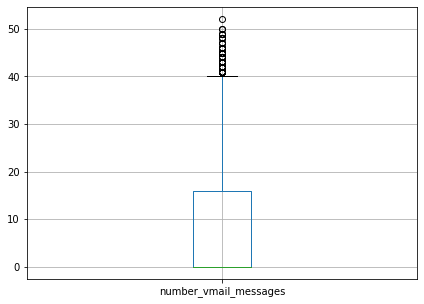

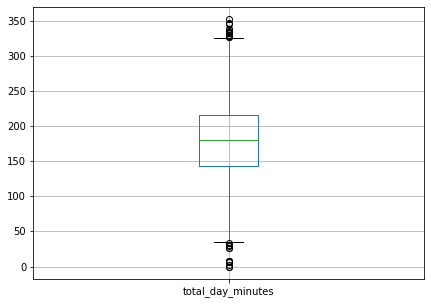

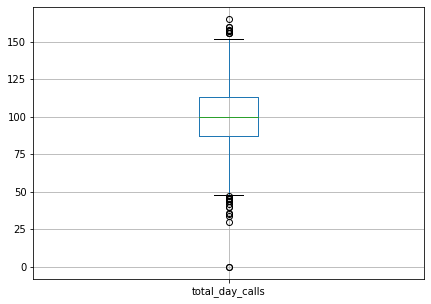

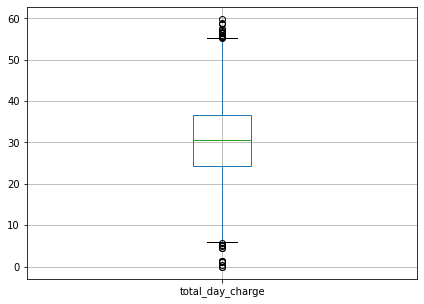

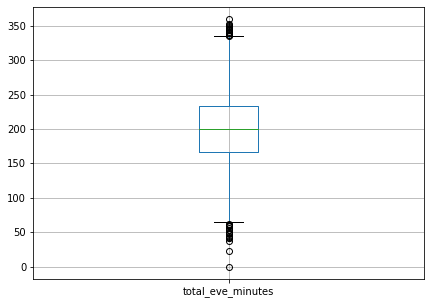

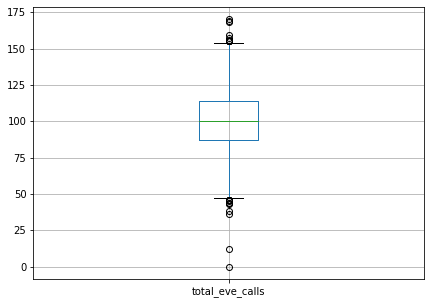

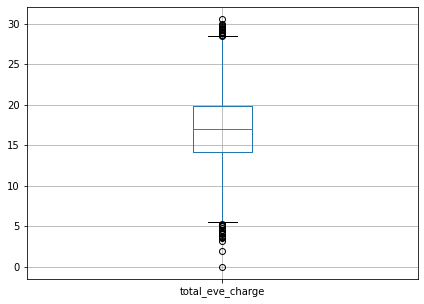

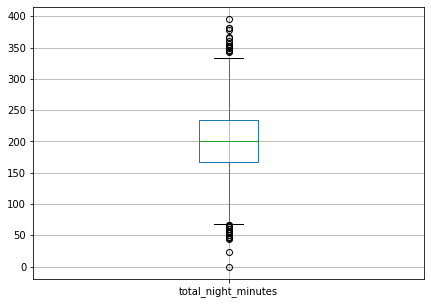

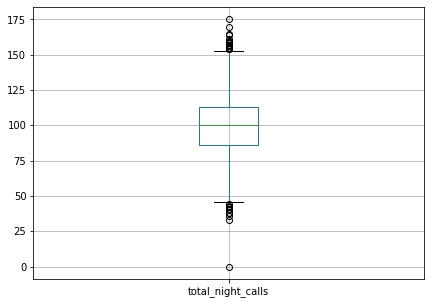

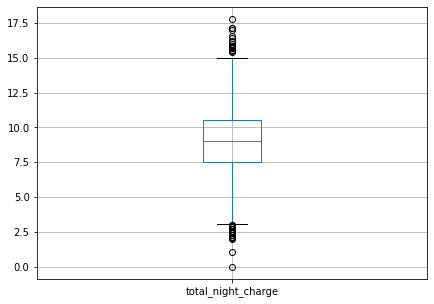

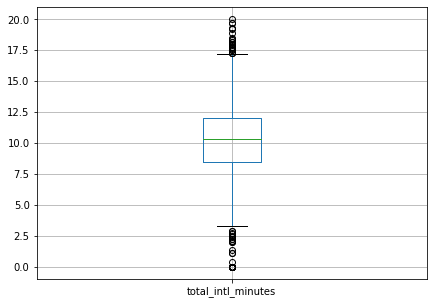

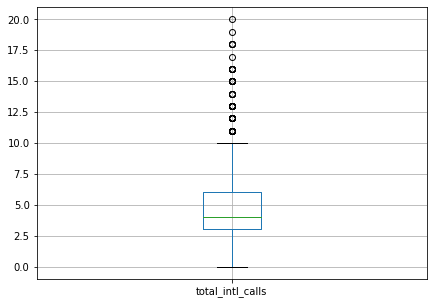

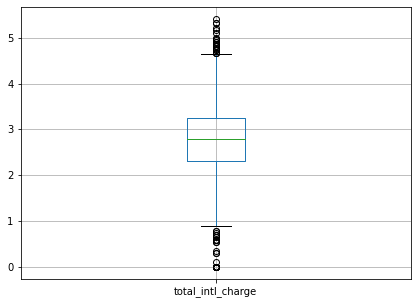

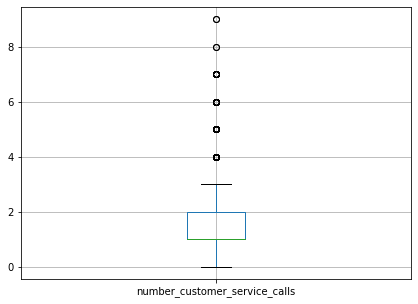

In [ ]:
box_df = train[['number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 7, 5
for column in box_df:
    plt.figure()
    box_df.boxplot([column])

In [ ]:
cat_var = [ feature for feature in train.columns if train[feature].dtypes=='O']
print('Daftar variabel kategori {}'.format(cat_var))

Daftar variabel kategori ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


In [ ]:
# Analisis unvariate untuk variabel kategori
#menampilkan persentase
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

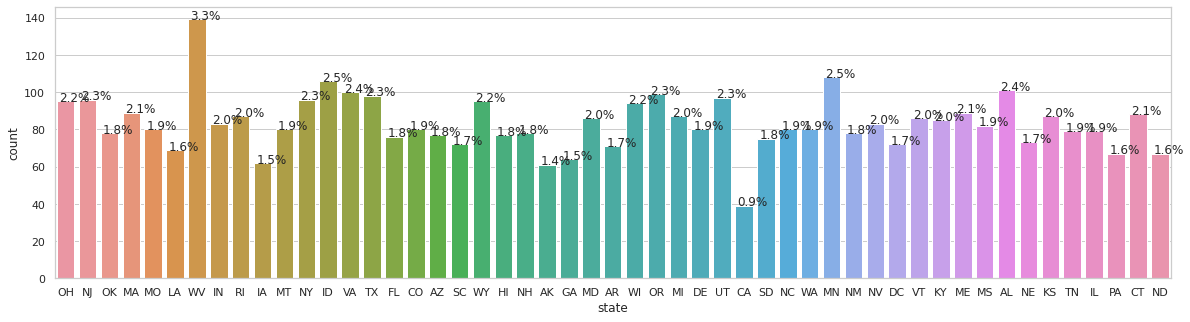

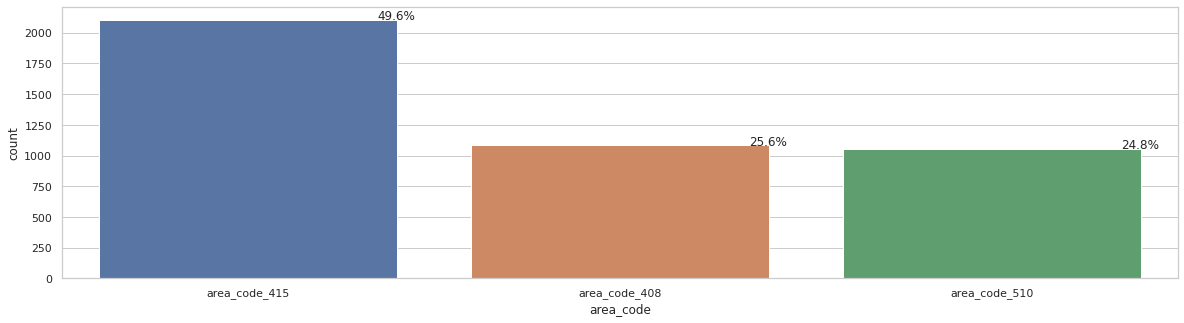

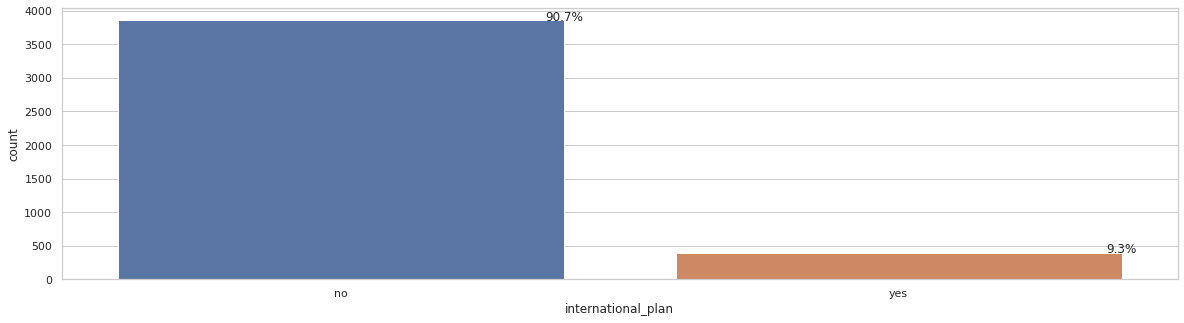

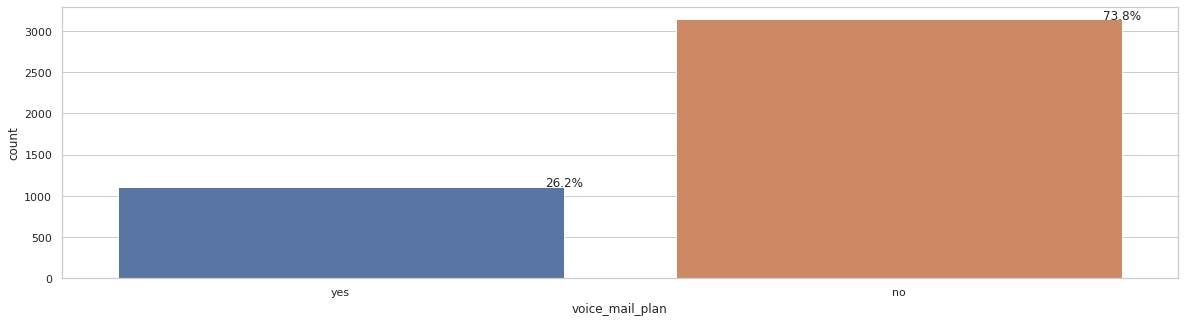

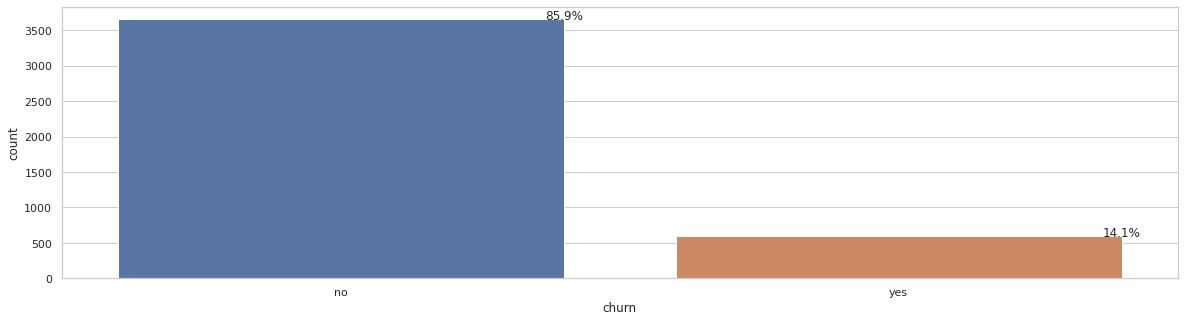

In [ ]:
# mengambil variabel kategori
for feature in cat_var:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(train)
    ax = sns.countplot(x = train[feature], data = train)
    #plt.title(feature)
    with_per(total, ax)
    plt.show()

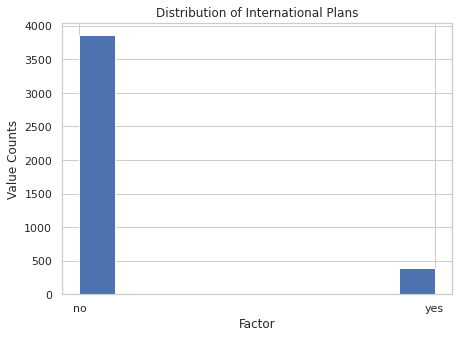

In [ ]:
#customer yang menggunakan international plan
plt.hist(train['international_plan'])
plt.title("Distribution of International Plans")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

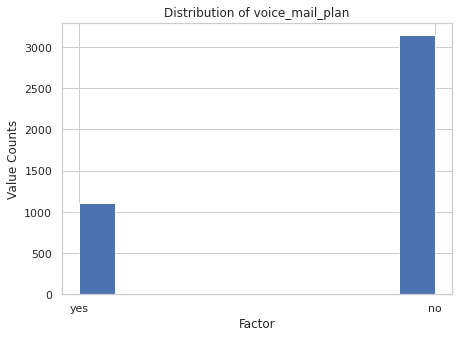

In [ ]:
#Banyaknya customer memakai voice mail
plt.hist(train['voice_mail_plan'])
plt.title("Distribution of voice_mail_plan")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

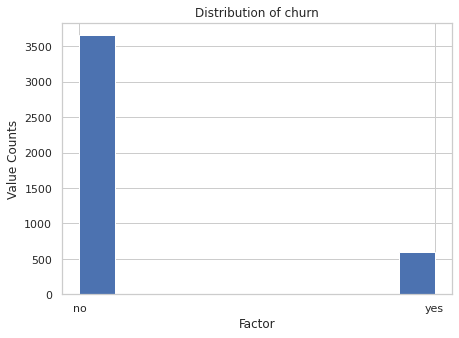

In [ ]:
#banyaknya customer yang diindikasi churn
plt.hist(train['churn'])
plt.title("Distribution of churn")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

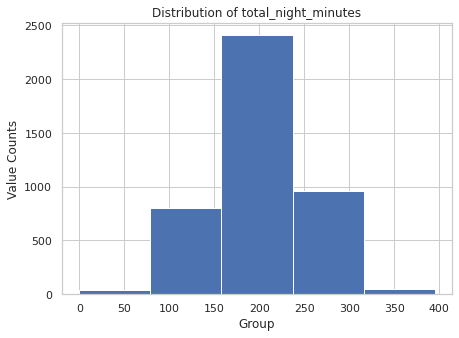

In [ ]:
#distribusi data
plt.hist(train['total_night_minutes'], 5)
plt.title("Distribution of total_night_minutes")
plt.ylabel("Value Counts")
plt.xlabel("Group")
plt.show()

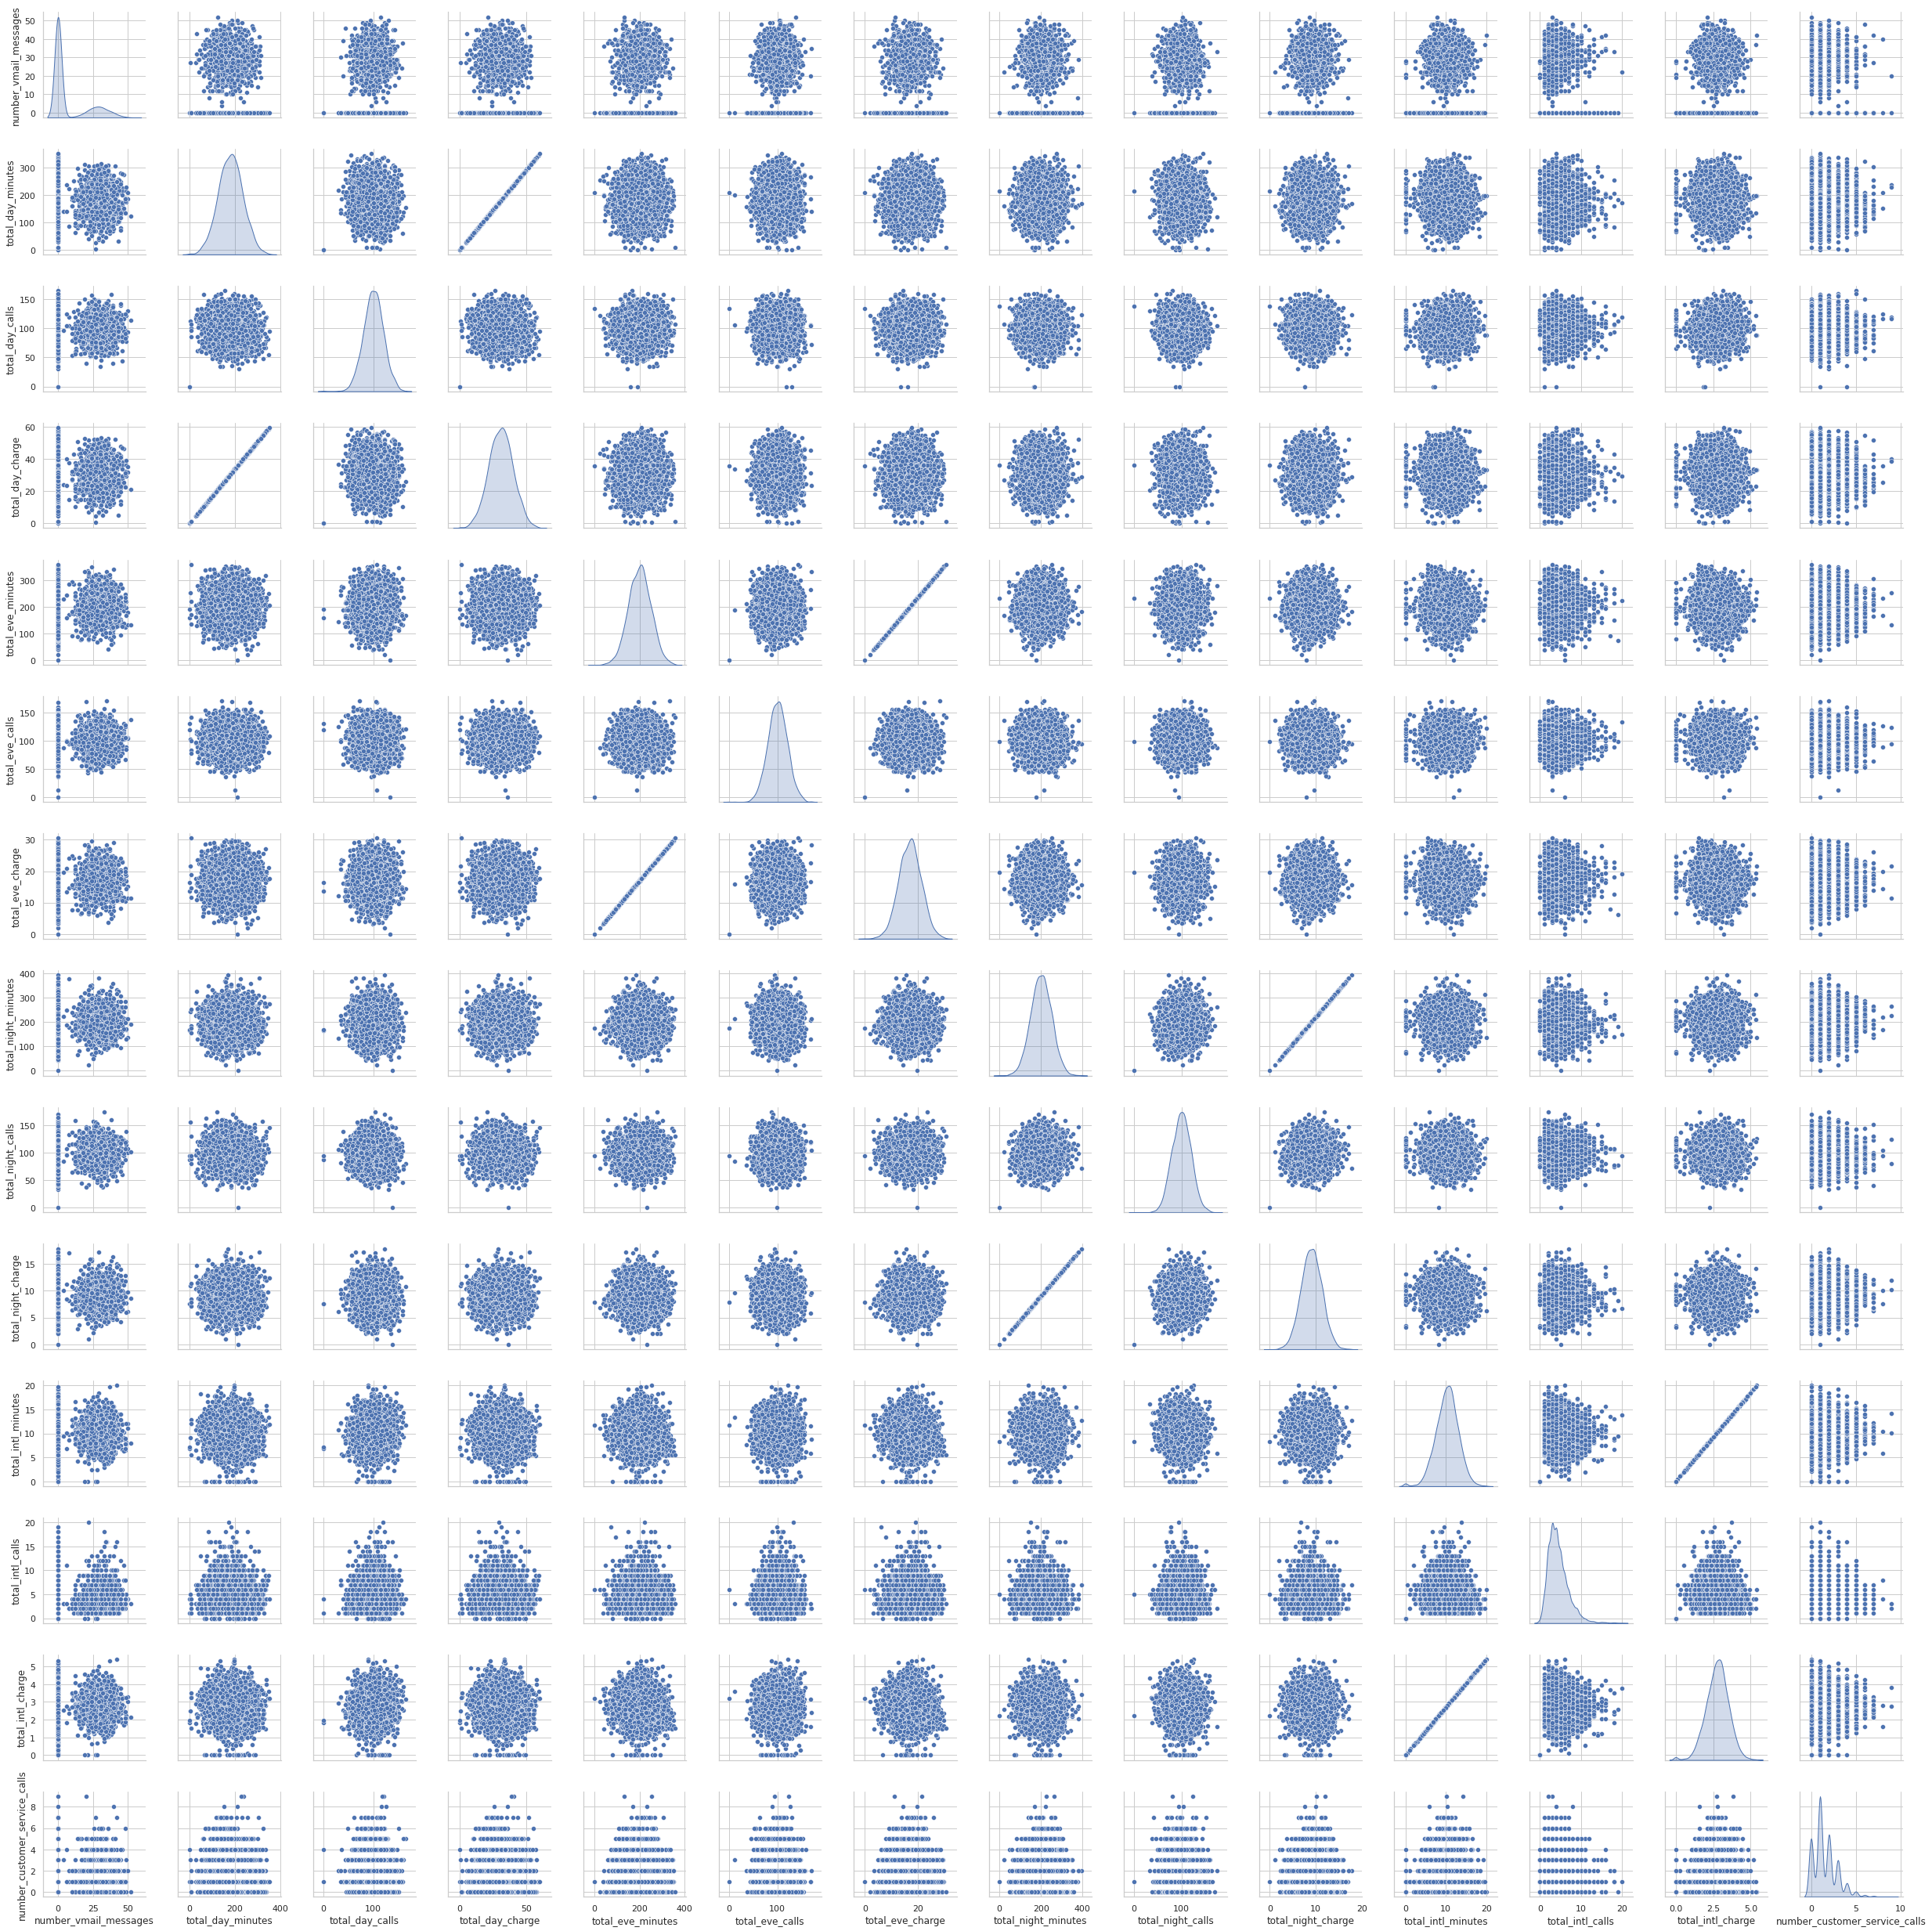

In [ ]:
#Hubungan antar kolom dalam grafik seaborn
sns.pairplot(train[['international_plan',
       'voice_mail_plan','number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']], diag_kind='kde')

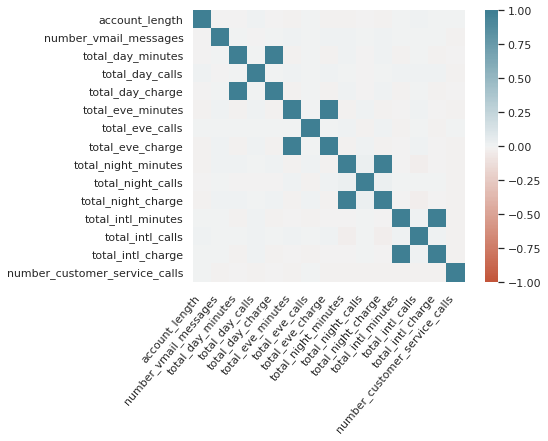

In [ ]:
#korelasi antara keseluruhan parameter
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);

In [ ]:
#5 data teratas
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


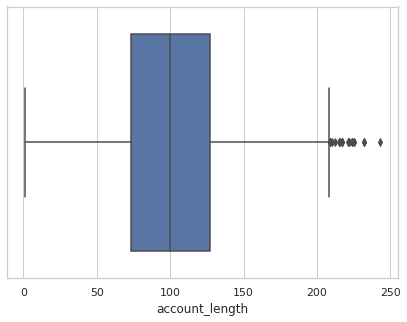

In [ ]:
#outlier
sns.boxplot(x=train['account_length'])

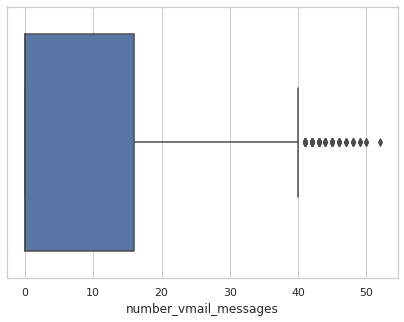

In [ ]:
sns.boxplot(x=train['number_vmail_messages'])

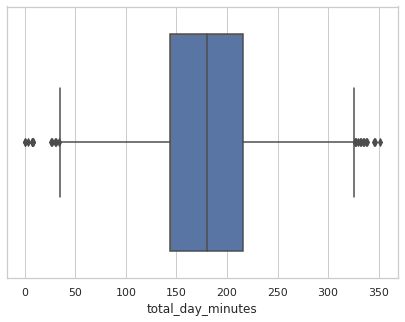

In [ ]:
sns.boxplot(x=train['total_day_minutes'])

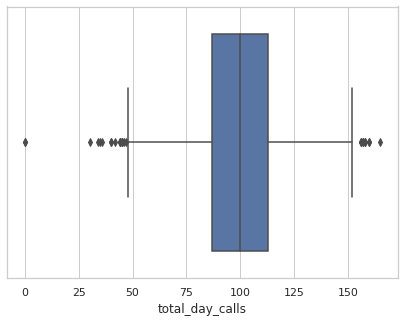

In [ ]:
sns.boxplot(x=train['total_day_calls'])

In [ ]:
#Normalisasi data numerik
numeric = train[['number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]
from sklearn.preprocessing import MinMaxScaler
# Menggunakan fit scaler pada training data
norm = MinMaxScaler().fit(numeric)
# transform training data
normal_numeric_data = norm.transform(numeric)
cols = numeric.columns.values
# menggunakan data ternomalisasi pada dataframe
normal_numeric_data = pd.DataFrame(data = normal_numeric_data, columns = cols)
normal_numeric_data.head(5)

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
1,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
2,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
3,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
4,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,0.538548,0.375,0.35,0.375926,0.333333


In [ ]:
#normalisasi data kategorik

labelencoder = LabelEncoder()
Categorical = train[['international_plan','voice_mail_plan','churn']]
Categorical = Categorical.apply(LabelEncoder().fit_transform)
Categorical.head(5)

,international_plan,voice_mail_plan,churn
0,0,1,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [ ]:
#seleksi fitur dengan ANOVA
import warnings
warnings.filterwarnings('ignore')
total_data = numeric
total_data['international_plan'] = Categorical.international_plan
total_data['voice_mail_plan'] = Categorical.voice_mail_plan
total_data['churn'] = Categorical.churn
total_data.head(5)

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan,voice_mail_plan,churn
0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
2,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
3,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0
4,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,1,0


Feature 0: 30.133387
Feature 1: 153.101652
Feature 2: 0.031118
Feature 3: 153.084723
Feature 4: 23.800096
Feature 5: 0.366393
Feature 6: 23.797432
Feature 7: 14.032573
Feature 8: 0.003956
Feature 9: 14.027386
Feature 10: 7.758674
Feature 11: 5.858407
Feature 12: 7.754311
Feature 13: 140.831230
Feature 14: 198.016516
Feature 15: 40.598683


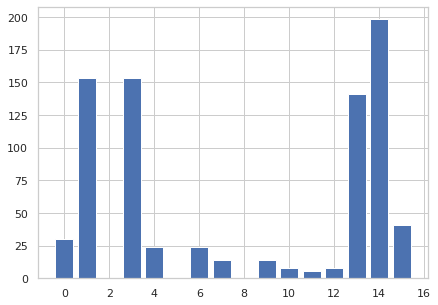

In [ ]:

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# load the dataset
l = len(total_data.columns.values)
l = l - 1
X = total_data.iloc[:,0:l]
y = total_data.churn
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
score = []
score = fs.scores_
selected_feature = []
i = 0
while i<len(score):
    if score[i] > 15:
        selected_feature.append(i)
    i = i+1
print("Fitur yang dipilih: ",selected_feature)
print()
print("Index dari kolom data:")
print()
i = 0
while i<len(total_data.columns):
    print("Index: ",i," ",total_data.columns[i])
    i = i+1
final_selected_df = pd.DataFrame()
final_selected_df['number_vmail_messages'] = total_data['number_vmail_messages']
final_selected_df['total_day_minutes'] = total_data['total_day_minutes']
final_selected_df['total_day_charge'] = total_data['total_day_charge']
final_selected_df['total_eve_minutes'] = total_data['total_eve_minutes']
final_selected_df['total_eve_charge'] = total_data['total_eve_charge']
final_selected_df['number_customer_service_calls'] = total_data['number_customer_service_calls']
final_selected_df['international_plan'] = total_data['international_plan']
final_selected_df['voice_mail_plan'] = total_data['voice_mail_plan']
final_selected_df['churn'] = total_data['churn']
final_selected_df.head(5)

Fitur yang dipilih:  [0, 1, 3, 4, 6, 13, 14, 15]

Index dari kolom data:

Index:  0   number_vmail_messages
Index:  1   total_day_minutes
Index:  2   total_day_calls
Index:  3   total_day_charge
Index:  4   total_eve_minutes
Index:  5   total_eve_calls
Index:  6   total_eve_charge
Index:  7   total_night_minutes
Index:  8   total_night_calls
Index:  9   total_night_charge
Index:  10   total_intl_minutes
Index:  11   total_intl_calls
Index:  12   total_intl_charge
Index:  13   number_customer_service_calls
Index:  14   international_plan
Index:  15   voice_mail_plan
Index:  16   churn


,number_vmail_messages,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,number_customer_service_calls,international_plan,voice_mail_plan,churn
0,26,161.6,27.47,195.5,16.62,1,0,1,0
1,0,243.4,41.38,121.2,10.30,0,0,0,0
2,0,299.4,50.90,61.9,5.26,2,1,0,0
3,0,166.7,28.34,148.3,12.61,3,1,0,0
4,24,218.2,37.09,348.5,29.62,3,0,1,0


In [ ]:
#Ekspor dataframe ke bentuk .csv
final_selected_df.to_csv("final_selected_df.csv",index = False)

In [ ]:
#Membaca dataset
churn_data = pd.read_csv('final_selected_df.csv')
print()
print("Shape dataset sebesar: ",churn_data.shape)


Shape dataset sebesar:  (4250, 9)


In [ ]:
churn_data.columns

Index(['number_vmail_messages', 'total_day_minutes', 'total_day_charge',
       'total_eve_minutes', 'total_eve_charge',
       'number_customer_service_calls', 'international_plan',
       'voice_mail_plan', 'churn'],
      dtype='object')

In [ ]:
#Mengecek nilai null dan memisahkan data input/output
print("Nilai null yang ada pada tiap kolom")
print(churn_data.isnull().sum(axis = 0))


Nilai null yang ada pada tiap kolom
number_vmail_messages            0
total_day_minutes                0
total_day_charge                 0
total_eve_minutes                0
total_eve_charge                 0
number_customer_service_calls    0
international_plan               0
voice_mail_plan                  0
churn                            0
dtype: int64


In [ ]:
X=churn_data.loc[:, churn_data.columns != 'churn']

In [ ]:
y=churn_data['churn']

	Model			Train Acc	Test Acc
Support Vector Machine		   87 % 	   86 % 	  


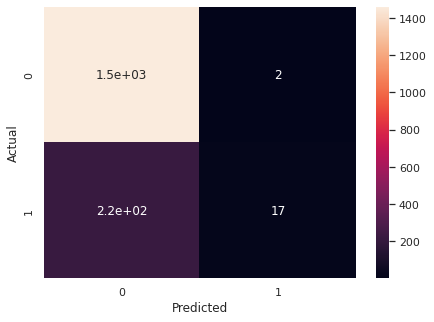

Confusion Matrix: SVM 
[[1461    2]
 [ 220   17]]
Classification Report:SVM 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1463
           1       0.89      0.07      0.13       237

    accuracy                           0.87      1700
   macro avg       0.88      0.54      0.53      1700
weighted avg       0.87      0.87      0.82      1700

('Akurasi SVM (dalam persen):', 86.94117647058823)


In [ ]:
# permodelan SVM untuk mengetahui apakah churn atau tidak

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

clf = SVC()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Support Vector Machine\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: SVM "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:SVM "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Akurasi SVM (dalam persen):" ,LR_accuracy*100))
Accuracy_SVM=LR_accuracy*100

	Model			Train Acc	Test Acc
Logistic Regression		   86 % 	   86 % 	  


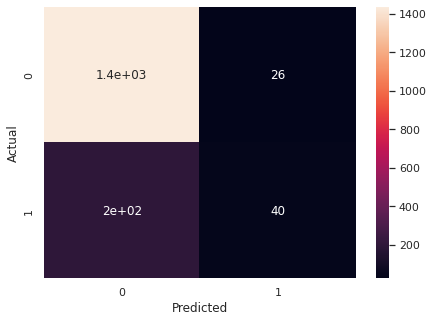

Confusion Matrix: Logistic Regression 
[[1437   26]
 [ 197   40]]
Classification Report:Logistic Regression 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1463
           1       0.61      0.17      0.26       237

    accuracy                           0.87      1700
   macro avg       0.74      0.58      0.60      1700
weighted avg       0.84      0.87      0.84      1700

('Akurasi Logistic Regression', 86.88235294117646)


In [ ]:
#Regresi jenis Logistik 
clf = LogisticRegression()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Logistic Regression\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Logistic Regression "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Logistic Regression "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Akurasi Logistic Regression" ,LR_accuracy*100))
Accuracy_Logistic=LR_accuracy*100

	Model			Train Acc	Test Acc
Decision Tree Classifier		   100 % 	   89 % 	  


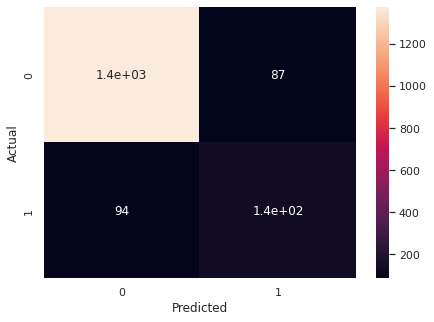

Confusion Matrix: Decision Tree Classifier 
[[1376   87]
 [  94  143]]
Classification Report:Decision Tree Classifier 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1463
           1       0.62      0.60      0.61       237

    accuracy                           0.89      1700
   macro avg       0.78      0.77      0.78      1700
weighted avg       0.89      0.89      0.89      1700

('Akurasi Decision Tree:', 89.3529411764706)


In [ ]:
#Permodelan Decision Tree Classifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Decision Tree Classifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Decision Tree Classifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Decision Tree Classifier "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Akurasi Decision Tree:" ,LR_accuracy*100))
Accuracy_Decision=LR_accuracy*100

	Model			Train Acc	Test Acc
Random Forest Classifier 	   100 % 	   93 % 	  


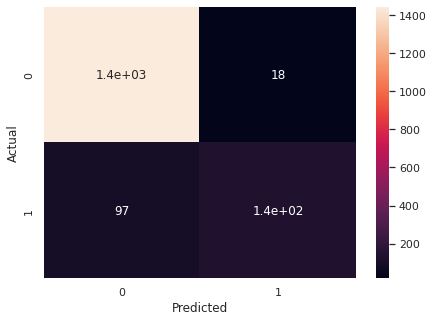

Confusion Matrix: Random Forest Classifier 
[[1445   18]
 [  97  140]]
Classification Report:Random Forest Classifier 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1463
           1       0.89      0.59      0.71       237

    accuracy                           0.93      1700
   macro avg       0.91      0.79      0.84      1700
weighted avg       0.93      0.93      0.93      1700

('Akurasi Random Forest', 93.23529411764706)


In [ ]:
#Klasifikasi dengan Random Forest 

clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Random Forest Classifier \t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Random Forest Classifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Random Forest Classifier "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Akurasi Random Forest" ,LR_accuracy*100))
Accuracy_Random=LR_accuracy*100

A KNeighborsClassifier model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
KNeighborsClassifier		   86 % 	   86 % 	  


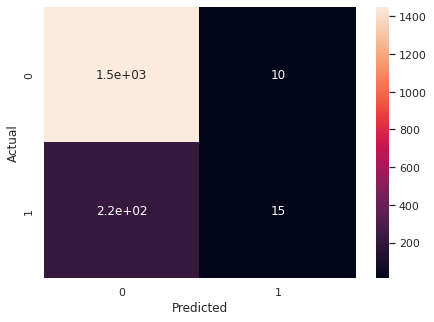

Confusion Matrix: KNeighborsClassifier 
[[1453   10]
 [ 222   15]]
Classification Report:KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1463
           1       0.60      0.06      0.11       237

    accuracy                           0.86      1700
   macro avg       0.73      0.53      0.52      1700
weighted avg       0.83      0.86      0.81      1700

('Akurasi KNeighbor', 86.3529411764706)


In [ ]:
#Klasifikasi dengan KNeighbor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

print("A KNeighborsClassifier model to predict whether a customer churn or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("KNeighborsClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: KNeighborsClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:KNeighborsClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Akurasi KNeighbor" ,LR_accuracy*100))
Accuracy_KNeighborsClassifier=LR_accuracy*100

In [ ]:
#Membandingkan masing-masing akurasi

AA=pd.DataFrame()
AA['Algorithm']=[ 'SVM','Random Forest Classifier','Logistic Regression','Decision Tree Classifier'
                ,'KNeighborsClassifier ']

In [ ]:
AA['Accuracy (%)']=[Accuracy_SVM , Accuracy_Random,Accuracy_Logistic, Accuracy_Decision,
                   Accuracy_KNeighborsClassifier]

In [ ]:
AA=AA.sort_values(['Accuracy (%)'])

In [ ]:
AA

,Algorithm,Accuracy (%)
4,KNeighborsClassifier,86.352941
2,Logistic Regression,86.882353
0,SVM,86.941176
3,Decision Tree Classifier,89.352941
1,Random Forest Classifier,93.235294


In [ ]:
fig = px.bar(AA, x='Algorithm', y='Accuracy (%)',title="Akurasi masing-masing",color='Accuracy (%)')
fig.show()